<a href="https://colab.research.google.com/github/manelnh/ML-zoomcamp-homework/blob/main/MLhomework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [ ]:
!wget $data

--2025-10-15 22:46:29--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-10-15 22:46:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv.3’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.02s   

2025-10-15 22:46:29 (4.59 MB/s) - ‘course_lead_scoring.csv.3’ saved [80876/80876]

FINISHED --2025-10-15 22:46:29--
Total wall clock time: 0.1s
Downloaded: 1 files, 79K in 0.02s (4.59 MB/s)


In [ ]:
df = pd.read_csv('course_lead_scoring.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461
lead_source,paid_ads,social_media,events,paid_ads,referral,events,social_media,social_media,referral,paid_ads,...,organic_search,paid_ads,referral,referral,social_media,referral,referral,paid_ads,referral,organic_search
industry,NaN,retail,healthcare,retail,education,manufacturing,technology,NaN,healthcare,other,...,retail,education,finance,finance,healthcare,manufacturing,technology,technology,NaN,finance
number_of_courses_viewed,1,1,5,2,3,1,0,5,4,3,...,1,2,0,2,1,1,3,1,5,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0,59904.0,51283.0,62975.0,38648.0,59866.0,...,49154.0,65742.0,75546.0,NaN,45253.0,NaN,65259.0,45688.0,71016.0,92855.0
employment_status,unemployed,employed,unemployed,NaN,self_employed,NaN,NaN,student,unemployed,student,...,student,employed,NaN,NaN,NaN,self_employed,student,student,self_employed,student
location,south_america,south_america,australia,australia,europe,africa,middle_east,europe,south_america,australia,...,africa,australia,asia,south_america,australia,north_america,europe,north_america,north_america,north_america
interaction_count,4,1,3,1,3,6,2,4,2,3,...,4,0,0,3,6,4,2,3,0,3
lead_score,0.94,0.8,0.69,0.87,0.62,0.83,0.57,0.62,0.86,0.43,...,0.37,0.57,0.1,0.47,0.24,0.53,0.24,0.02,0.25,0.41
converted,1,0,1,0,1,1,0,1,1,1,...,1,0,0,1,1,1,1,1,1,1


In [ ]:
df.dtypes

,0
lead_source,object
industry,object
number_of_courses_viewed,int64
annual_income,float64
employment_status,object
location,object
interaction_count,int64
lead_score,float64
converted,int64


Handling missing values

In [ ]:
df.isna().sum()

,0
lead_source,128
industry,134
number_of_courses_viewed,0
annual_income,181
employment_status,100
location,63
interaction_count,0
lead_score,0
converted,0


In [ ]:
categorical = df.select_dtypes(include='object').columns
df[categorical]= df[categorical].fillna('NA')

In [ ]:
numerical = df.select_dtypes(include='number').columns
df[numerical] = df[numerical].fillna(0)

In [ ]:
df.isna().sum()

,0
lead_source,0
industry,0
number_of_courses_viewed,0
annual_income,0
employment_status,0
location,0
interaction_count,0
lead_score,0
converted,0


## Question 1

In [ ]:
value = df['industry'].mode().iloc[0]
value

'retail'

## Question 2 :Correlation Matrix

In [ ]:

correlation = df.select_dtypes(include=['number']).corrwith(df.converted)
correlation

,0
number_of_courses_viewed,0.435914
annual_income,0.053131
interaction_count,0.374573
lead_score,0.193673
converted,1.000000


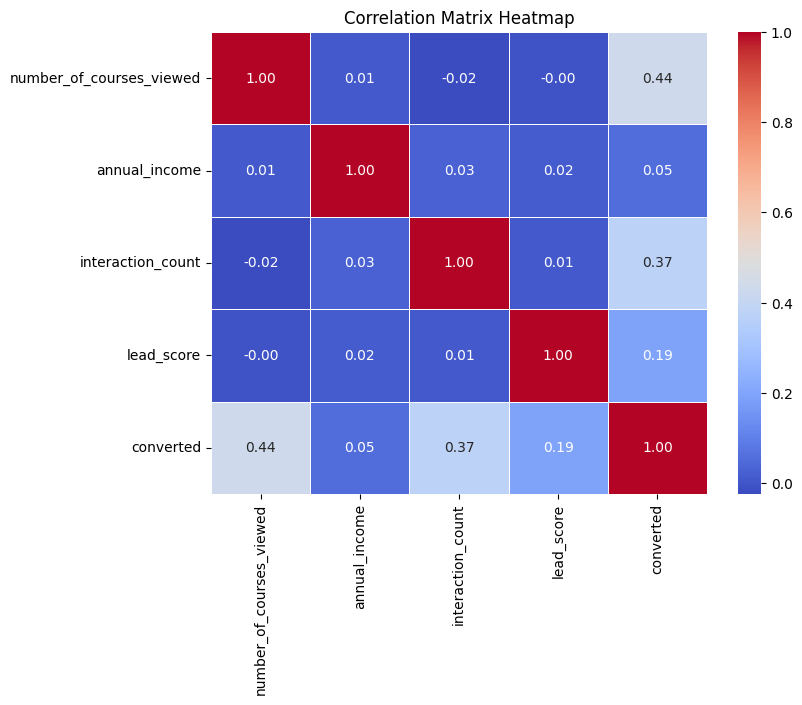

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Setting up the validatiopn framework



In [ ]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
len(df_full_train), len(df_test)

(1169, 293)

In [ ]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [ ]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [ ]:
#to shuffle indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [ ]:
del df_train['converted']
#del df_val['converted']
del df_test['converted']

In [ ]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
1,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
2,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
3,NA,technology,1,74956.0,employed,europe,3,0.34
4,organic_search,retail,3,59335.0,student,australia,1,0.98


# Feature Importance: mutual information

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(df_full_train.industry, df_full_train.converted)

np.float64(0.020849270129063624)

In [ ]:
def mutual_info_converted(series):
  return mutual_info_score(series, df_full_train.converted)

In [ ]:
categorical =df_full_train.select_dtypes(include='object').columns
numerical = df_full_train.select_dtypes(include='number').columns

## Question 3

In [ ]:
mi = df_full_train[categorical].apply(mutual_info_converted)
mi.sort_values(ascending=False)
mi.round(2)

,0
lead_source,0.04
industry,0.02
employment_status,0.00
location,0.01


## one-hot encoding

In [ ]:
df_train.select_dtypes(include='object')

,lead_source,industry,employment_status,location
0,paid_ads,retail,student,middle_east
1,organic_search,manufacturing,student,middle_east
2,paid_ads,technology,employed,north_america
3,NA,technology,employed,europe
4,organic_search,retail,student,australia
...,...,...,...,...
871,organic_search,other,employed,australia
872,social_media,retail,employed,north_america
873,NA,education,employed,asia
874,social_media,manufacturing,self_employed,europe


In [ ]:
categorical_var = df_train.select_dtypes(include='object').columns
numerical_var = df_train.select_dtypes(include='number').columns

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
train_dict = df_train[list(categorical_var) + list(numerical_var)].to_dict(orient='records')

In [ ]:
X_train = dv.fit_transform(train_dict)

In [ ]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [ ]:
val_dict = df_val[list(categorical_var) + list(numerical_var)].to_dict(orient='records')

In [ ]:
X_val = dv.transform(val_dict)

In [ ]:
test_dict = df_test[list(categorical_var) + list(numerical_var)].to_dict(orient='records')

In [ ]:
X_test = dv.transform(test_dict)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((876, 31), (293, 31), (293, 31))

# Logistic regression

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
z = np.linspace(-10, 10, 100)

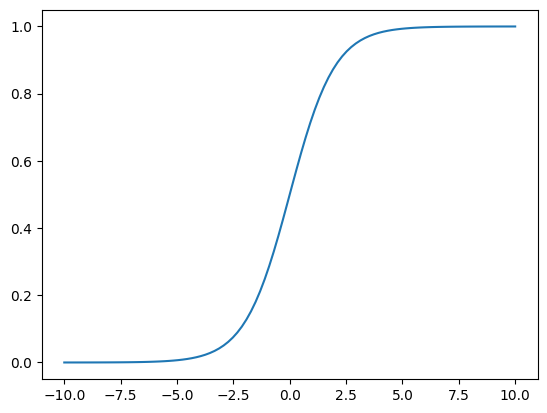

In [ ]:
plt.plot(z, sigmoid(z))

In [ ]:
def logistic_regression(xi):
  score = w0

  for j in range(len(w)):
    score = score + xi[j] * w[j]

  result = sigmoid(score)

  return result

## Question 4 :Training logistic regression with scikit learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.6996587030716723

## Question 5

In [ ]:
df_train_1 = df_train.drop(columns=['industry'])
X_train_1 = dv.fit_transform(df_train_1.to_dict(orient='records'))

df_val_1 = df_val.drop(columns=['industry'])
X_val_1 = dv.transform(df_val_1.to_dict(orient='records'))

In [ ]:
dv_1 = DictVectorizer(sparse=False)
train_dict_1 = df_train_1.to_dict(orient='records')
X_train_1 = dv_1.fit_transform(train_dict_1)

val_dict_1 = df_val_1.to_dict(orient='records')
X_val_1 = dv_1.transform(val_dict_1)

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_1, y_train)
y_pred = model.predict(X_val_1)
accuracy1 = accuracy_score(y_val, y_pred)
accuracy_diff = accuracy - accuracy1
accuracy_diff

0.0

In [ ]:
df_train_ = df_train.drop(columns=['lead_score'])
X_train_ = dv.fit_transform(df_train_.to_dict(orient='records'))

df_val_ = df_val.drop(columns=['lead_score'])
X_val_ = dv.transform(df_val_.to_dict(orient='records'))

dv = DictVectorizer(sparse=False)
train_dict_= df_train_.to_dict(orient='records')
X_train_ = dv.fit_transform(train_dict_)

val_dict_ = df_val_.to_dict(orient='records')
X_val_ = dv.transform(val_dict_)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_, y_train)
y_pred = model.predict(X_val_)
accuracy2 = accuracy_score(y_val, y_pred)
accuracy_diff = accuracy - accuracy2
accuracy_diff

-0.0068259385665528916

In [ ]:
df_train_ = df_train.drop(columns=['employment_status'])
X_train_ = dv.fit_transform(df_train_.to_dict(orient='records'))

df_val_ = df_val.drop(columns=['employment_status'])
X_val_ = dv.transform(df_val_.to_dict(orient='records'))

dv = DictVectorizer(sparse=False)
train_dict_ = df_train_.to_dict(orient='records')
X_train_ = dv.fit_transform(train_dict_)

val_dict_ = df_val_.to_dict(orient='records')
X_val_ = dv.transform(val_dict_)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_, y_train)
y_pred = model.predict(X_val_2)
accuracy3 = accuracy_score(y_val, y_pred)
accuracy_diff = accuracy - accuracy3
accuracy_diff

0.0034129692832763903

## Question 6

In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]
best_accuracy = 0
best_C = None

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"C={C}: Validation Accuracy = {accuracy:.3f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

print(f"\nBest C value: {best_C} with Validation Accuracy: {best_accuracy:.3f}")


C=0.01: Validation Accuracy = 0.700
C=0.1: Validation Accuracy = 0.700
C=1: Validation Accuracy = 0.700
C=10: Validation Accuracy = 0.700
C=100: Validation Accuracy = 0.700

Best C value: 0.01 with Validation Accuracy: 0.700
